In [1]:
!pip install -q -U google-generativeai

# Import Packages

In [2]:
import pathlib
import textwrap

import google.generativeai as genai

from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('•', ' *')
  return Markdown(textwrap.indent(text,'>', predicate=lambda _: True))

# Setup your API key

In [3]:
import os
os.environ["GOOGLE_API_KEY"] = userdata.get("GOOGLE_API_KEY")

In [4]:
genai.configure(api_key=os.environ["GOOGLE_API_KEY"]  )

In [5]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash
models/gemini-1.5-flash-001-tuning


In [7]:
model = genai.GenerativeModel('gemini-pro')
model

genai.GenerativeModel(
    model_name='models/gemini-pro',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

In [8]:
%%time
response = model.generate_content("What is the meaning of life?")


CPU times: user 123 ms, sys: 14.3 ms, total: 137 ms
Wall time: 11.1 s


In [9]:
to_markdown(response.text)

>**Philosophical Perspectives:**
>
>* **Existentialism:** There is no inherent meaning in life, but individuals create their own meaning through their actions and choices. (e.g., Søren Kierkegaard, Jean-Paul Sartre)
>* **Absurdism:** Life is ultimately meaningless and devoid of purpose. The human quest for meaning is an illusion. (e.g., Albert Camus)
>* **Nihilism:** There is no objective meaning, truth, or value in existence. (e.g., Friedrich Nietzsche)
>* **Hedonism:** The goal of life is to maximize pleasure and minimize pain. (e.g., Epicurus)
>* **Stoicism:** The meaning of life lies in living in accordance with nature and virtue, regardless of external circumstances. (e.g., Marcus Aurelius)
>
>**Religious Perspectives:**
>
>* **Theism:** The meaning of life is to love, serve, and glorify God. Life is a journey to reconnect with the divine and achieve salvation. (e.g., Christianity, Islam, Judaism)
>* **Buddhism:** The goal of life is to end suffering and achieve enlightenment through the Eightfold Path. (e.g., Theravada, Mahayana)
>* **Hinduism:** The purpose of life is to fulfill one's dharma (duty), evolve through the cycle of rebirth, and attain moksha (liberation from the cycle). (e.g., Advaita Vedanta)
>
>**Scientific Perspectives:**
>
>* **Evolutionary Psychology:** The meaning of life is to survive, reproduce, and pass on genes. (e.g., Richard Dawkins)
>* **Neuroscience:** The pursuit of meaning is a fundamental aspect of human consciousness and brain function. (e.g., Viktor Frankl)
>
>**Individual Perspectives:**
>
>* **Purpose:** Finding a sense of purpose or mission that gives direction and fulfillment.
>* **Connection:** Having meaningful relationships with others and feeling connected to a community.
>* **Growth:** Learning, evolving, and improving oneself through personal development.
>* **Contribution:** Making a positive impact on the world and leaving a legacy.
>* **Happiness:** Experiencing positive emotions and a sense of well-being.
>
>**Note:** The meaning of life is a highly subjective and personal question, and there is no single answer that fits everyone. The perspectives described above provide a starting point for exploration and reflection.

In [11]:
print(response.prompt_feedback)

In [12]:
response.candidates

[content {
  parts {
    text: "**Philosophical Perspectives:**\n\n* **Existentialism:** There is no inherent meaning in life, but individuals create their own meaning through their actions and choices. (e.g., S\303\270ren Kierkegaard, Jean-Paul Sartre)\n* **Absurdism:** Life is ultimately meaningless and devoid of purpose. The human quest for meaning is an illusion. (e.g., Albert Camus)\n* **Nihilism:** There is no objective meaning, truth, or value in existence. (e.g., Friedrich Nietzsche)\n* **Hedonism:** The goal of life is to maximize pleasure and minimize pain. (e.g., Epicurus)\n* **Stoicism:** The meaning of life lies in living in accordance with nature and virtue, regardless of external circumstances. (e.g., Marcus Aurelius)\n\n**Religious Perspectives:**\n\n* **Theism:** The meaning of life is to love, serve, and glorify God. Life is a journey to reconnect with the divine and achieve salvation. (e.g., Christianity, Islam, Judaism)\n* **Buddhism:** The goal of life is to end su

In [13]:
%%time
response = model.generate_content("What is the meaning of life?", stream=True)

CPU times: user 95.9 ms, sys: 8.51 ms, total: 104 ms
Wall time: 8.62 s


In [14]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

The meaning of life is a deeply personal and philosophical question that has been pondered by
________________________________________________________________________________
 humans for centuries. There is no single, universally accepted answer, as the meaning of life can vary from person to person and culture to culture. Some common themes
________________________________________________________________________________
 that emerge when considering the meaning of life include:

* **Purpose and Fulfillment:** Finding a sense of purpose and fulfillment in one's life can be a significant source of meaning. This can involve pursuing goals, contributing to society, or engaging in activities that bring joy and satisfaction.
* **Connection and Relationships:**
________________________________________________________________________________
 Building meaningful connections with others can be a fundamental aspect of the meaning of life. Relationships with family, friends, loved ones, and even

In [15]:
try:
  response.text
except Exception as e:
  print(f'{type(e).__name__}:{e}')

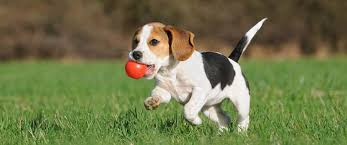

In [16]:
import PIL.Image

img = PIL.Image.open("/content/dogplaying.jpg")
img

In [20]:
model = genai.GenerativeModel('gemini-1.5-flash')

In [23]:
repsonse1 = model.generate_content(img)
to_markdown(repsonse1.text)

>This is a cute picture of a Beagle puppy playing fetch. The puppy is in focus and looks happy, and the blurry background is nice.  It's a good photo.

In [26]:
response2 = model.generate_content(["Can you write a small story based on this picture. It should include a description of the photo.",img], stream=True)

response2.resolve()

In [25]:
to_markdown(response2.text)

>The photo shows a beagle puppy running through a field of green grass. The puppy is holding a red rubber ball in its mouth and has a happy expression on its face. The puppy's tail is wagging and its ears are flopping in the wind. The puppy is running towards the camera, and it is clear that it is enjoying itself.
>
>The puppy's name is Max, and he is a playful and energetic dog. He loves to fetch and play with his toys. Max is a loyal companion and loves to spend time with his family. He is always happy to see them and loves to be petted. Max is a sweet and loving dog, and he brings joy to everyone who meets him. 
